# Ensemble methods using the  German Credit Data 


## Performing Ensemble methods on German Credit data<a class="anchor" id ="steps"></a>
## steps
[Data preprocessing](#step1)<br>
[Build a decision tree model](#step2)<br>
[model accuracy using Cross validation](#step3)<br>
[Ensemble methods](#step4)<br>
[Bagging](#step5)<br>
[Boosting](#step6)<br>
[Random Forest](#step7)<br>
[Grid search](#step8)<br>

## Step 1: Data Preprecessing<a class="anchor" id="step1"></a>

[go_back_up](#steps)

In [3]:
import pandas as pd
credit_data = pd.read_csv('credit.csv')
credit_data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,A11,6,A34,A43,1169,A65,A75,4,4,67,A143,A152,2,A173,1,A192,no
1,A12,48,A32,A43,5951,A61,A73,2,2,22,A143,A152,1,A173,1,A191,yes
2,A14,12,A34,A46,2096,A61,A74,2,3,49,A143,A152,1,A172,2,A191,no
3,A11,42,A32,A42,7882,A61,A74,2,4,45,A143,A153,1,A173,2,A191,no
4,A11,24,A33,A40,4870,A61,A73,3,4,53,A143,A153,2,A173,2,A191,yes


In [4]:
credit_data['checking_balance'].value_counts()

checking_balance
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

In [5]:
credit_data.shape

(1000, 17)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

2. Then you need to perform label encoding for predictors.




In [8]:
predictors = credit_data.iloc[:,0:16]
X = pd.get_dummies(data =predictors , drop_first = True)
X.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_A12,checking_balance_A13,checking_balance_A14,...,employment_duration_A74,employment_duration_A75,other_credit_A142,other_credit_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192
0,6,1169,4,4,67,2,1,False,False,False,...,False,True,False,True,True,False,False,True,False,True
1,48,5951,2,2,22,1,1,True,False,False,...,False,False,False,True,True,False,False,True,False,False
2,12,2096,2,3,49,1,2,False,False,True,...,True,False,False,True,True,False,True,False,False,False
3,42,7882,2,4,45,1,2,False,False,False,...,True,False,False,True,False,True,False,True,False,False
4,24,4870,3,4,53,2,2,False,False,False,...,False,False,False,True,False,True,False,True,False,False


3. Then let's perform label encoding for the target variable.



In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#y = credit_data[['default']]
y = labelencoder.fit_transform(credit_data['default'].values)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

4. Then let's split the data into training set and test set using **20%** of the data (using random_state = 0).



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape

(800, 39)

## Step 2: Build a Decision Tree<a class="anchor" id="step2"></a>

#### Perform a single decision tree model to predict customers’ default status. What is the performance accuracy of the decision tree model on the test set?

To answer this question, you will create a single decision tree model with default parameter values using **DecisionTreeClassifier** (set **random_state= 0**), and evaluate the decision tree model on the test set.


1.  first we build a decision tree model and apply it on the test set using **predict()**. We get the accuracy on the test set using **accuracy_score()**.


[go_back_up](#steps)

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

In [49]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.000


In [53]:
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.680


2. we also evaluate the model performance on the test set using ROC curve.



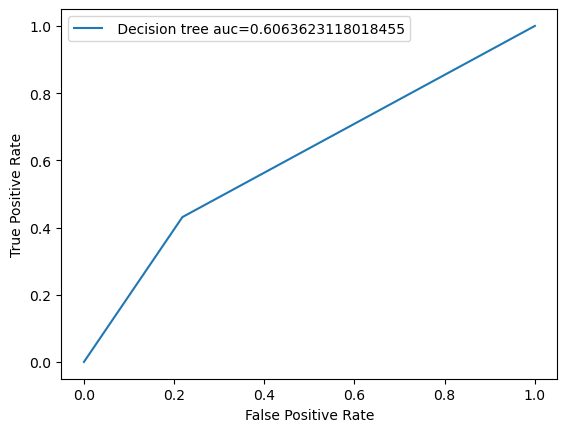

In [55]:
# create roc curve and calculate auc value
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt

y_pred_proba = tree.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

## Step 3: Cross Validation<a class="anchor" id="step3"></a>

#### What is the model accuracy of the decision tree model after performing the cross validation?

To answer this question, you need to performance cross validation using **cross_val_score**. Let's say we perform 5 fold cross validation.

[go_back_up](#steps)

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X,y, cv=5)
print('Accuracy score of each fold: {}'.format(scores))

#compute the mean of thescores
print('Average cross validation score: {:.2f}'.format(scores.mean()))

Accuracy score of each fold: [0.7   0.725 0.615 0.66  0.68 ]
Average cross validation score: 0.68


## Step 4: Emsemble Methods<a class="anchor" id="step4"></a>
In this step you will perform serveral emsemble methods and improve the model performance.

### Emsemble Method 1: Bagging 

#### Develop a bagging model (with 100 decision trees) on the training set and evaluate the model using the test set. What is the model performance? 

To answer this question, you need to create a bagging model using **BaggingClassifier** (with **n_estimator = 100**, **random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.

1. First, create a bagging classifier using BaggingClassifer and apply it on the test set
[go_back_up](#steps)

## Emsemble Method 1: Bagging <a class="anchor" id="step5"></a>
[go_back_up](#steps)

In [23]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier( n_estimators = 100, random_state= 0)
bagging.fit(X_train, y_train)
y_bagging_pred = bagging.predict(X_test)
print('bagging model accuracy on test set:{:.3f}'.format(accuracy_score(y_test,y_bagging_pred)))

bagging model accuracy on test set:0.770


2. Then we get the AUC for the bagging classifer.



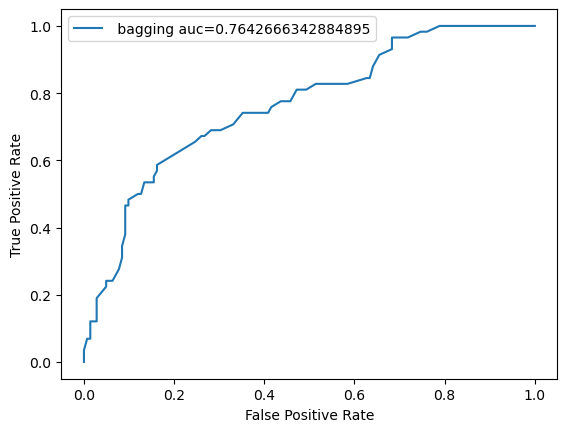

In [25]:
# create roc curve and calculate auc value
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt

y_pred_proba_bagging = bagging.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_bagging)
auc = metrics.roc_auc_score(y_test, y_pred_proba_bagging)
pyplot.plot(fpr,tpr,label=" bagging auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

### Emsemble Method 2: Boosting<a class="anchor" id="step6"></a>

#### Develop a boosting model (with 100 decision trees) on the training set and evaluate the model using the test set. What is the model performance? 

To answer this question, you need to create a boosting model using **AdaBoostClassifier** (with **n_estimator = 100**,**random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.

1. First, create a boosting classifier using AdaBoostClassifier() and apply it on the test set
[go_back_up](#steps)

In [27]:
from sklearn.ensemble import AdaBoostClassifier
boosting = AdaBoostClassifier( n_estimators = 100, random_state= 0)
boosting.fit(X_train, y_train)
y_boosting_pred = boosting.predict(X_test)
print('boosting model accuracy on test set:{:.3f}'.format(accuracy_score(y_test,y_boosting_pred)))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


boosting model accuracy on test set:0.770


2. Then we get the AUC for the boosting classifer.

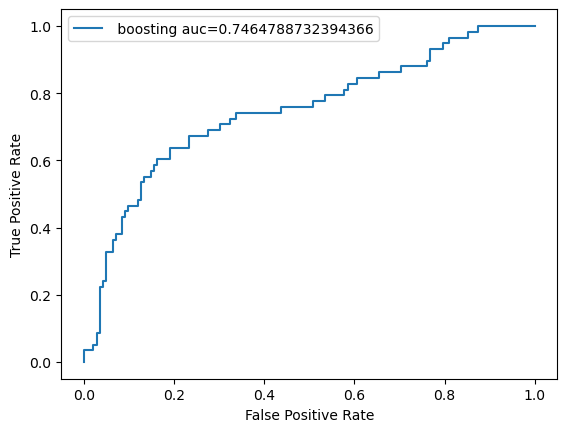

In [29]:
# create roc curve and calculate auc value
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt

y_pred_proba_boosting = boosting.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_boosting)
auc = metrics.roc_auc_score(y_test, y_pred_proba_boosting)
pyplot.plot(fpr,tpr,label=" boosting auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

### Emsemble Method 3: Random Forest<a class="anchor" id="step7"></a>

#### Develop a random forest model (with 100 decision trees) on the training set and evaluate the model using the test set. What is the model performance? 

To answer this question, you need to create a random forest model using **RandomForestClassifier** (with **n_estimator = 100**, **random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.

1. First, create a random forest classifier using RandomForestClassifier() and apply it on the test set.

[go_back_up](#steps)

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100, random_state= 0)
forest.fit(X_train, y_train)
y_forest_pred = forest.predict(X_test)
print('forest model accuracy on test set:{:.3f}'.format(accuracy_score(y_test,y_forest_pred)))

forest model accuracy on test set:0.755


2. Then we get the AUC for the random forest classifer.

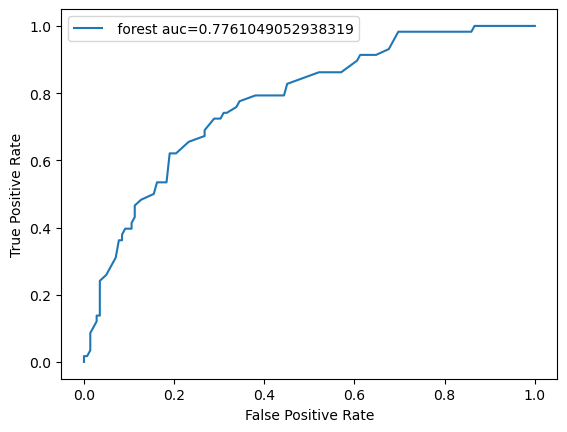

In [33]:
# create roc curve and calculate auc value
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt

y_pred_proba_forest = forest.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_forest)
auc = metrics.roc_auc_score(y_test, y_pred_proba_forest)
pyplot.plot(fpr,tpr,label=" forest auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

#### Based on the random forest model, which of the following is the most important feature in predicting the target variable?
To answer this questio, you need to get the importance of each variable which have been saved in **feature_importance_**.

In [35]:
importances = forest.feature_importances_
df = pd.DataFrame({'feature': X_train.columns,'importance': importances})
df = df.sort_values('importance')
print(df)

                    feature  importance
21              purpose_A48    0.001639
15             purpose_A410    0.003074
18              purpose_A44    0.003549
19              purpose_A45    0.005969
25      savings_balance_A64    0.007281
24      savings_balance_A63    0.009093
34             housing_A153    0.009370
31        other_credit_A142    0.009712
20              purpose_A46    0.010816
22              purpose_A49    0.011207
8      checking_balance_A13    0.012295
23      savings_balance_A62    0.012734
12       credit_history_A33    0.012787
37                 job_A174    0.013904
6                dependents    0.014020
29  employment_duration_A74    0.014317
35                 job_A172    0.014818
14              purpose_A41    0.015302
16              purpose_A42    0.017026
30  employment_duration_A75    0.017329
11       credit_history_A32    0.017518
10       credit_history_A31    0.018543
28  employment_duration_A73    0.018546
27  employment_duration_A72    0.018986


# Step 5: Grid Search<a class="anchor" id="step8"></a>

In this step we will improve the model’s performance by tuning its parameters.

#### Apply a hyperparameter tuning model using GridSearch algorithm on the training set and evaluate the model using the test set. What is the model performance??

To answer this question, use **GridSearchCV()** (set **random_state =0**)to tune the parameters in the decision tree model.The parameters we will tuned include: **criterion (gini or entropy)**, **max_leaf_nodes (ranges from 2 to 50)**, **max_depth(ranges from 3 to 15)**. In addition we perform cross validation as well.

1. first we define a combination of parameters and apply them to the decision tree model.
[go_back_up](#steps)

In [37]:
tree = DecisionTreeClassifier(random_state = 0)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [38]:
import numpy as np
from sklearn.model_selection import GridSearchCV
params ={'criterion': ['gini' ,'entropy'], 'max_leaf_nodes': list(range(2,50)),'max_depth':np.arange(3,15)}
tree_grid = GridSearchCV(tree,params,cv=10)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

#### What is the value of max_depth of the best model returned by hyperparameter tuning?
To answer this question, we can get the parameters of the best model using **best_estimator_** attribute.


In [40]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=17, random_state=0)

3. Then we apply this model on the test set and get the accuracy.



In [42]:
y_pred_grid = tree_grid.predict(X_test)
print('grid search model accuracy on test set:{:.3f}'.format(accuracy_score(y_test,y_pred_grid)))

grid search model accuracy on test set:0.740


4. Lastly we visualize ROC curve and estimate the AUC value.

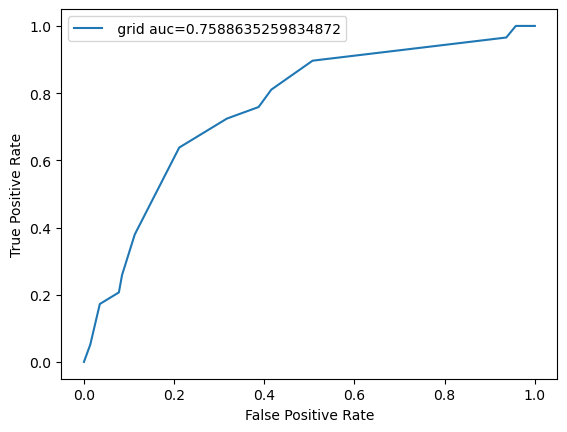

In [44]:
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt

y_pred_proba_grid =  tree_grid.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_grid)
auc = metrics.roc_auc_score(y_test, y_pred_proba_grid)
pyplot.plot(fpr,tpr,label=" grid auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

#### Which model performs the best (using AUC as the evaluation metric)?

To answer this question, you need to compare the models created and select the one with highest AUC.

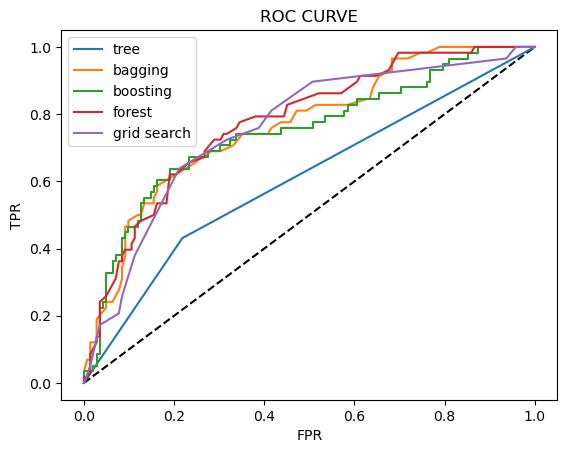

In [57]:
y_pred_proba = tree.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba)

y_pred_proba_bagging = bagging.predict_proba(X_test)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_proba_bagging)

y_pred_proba_boosting = boosting.predict_proba(X_test)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_proba_boosting)

y_pred_proba_forest = forest.predict_proba(X_test)[:,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_proba_forest)

y_pred_proba_grid =  tree_grid.predict_proba(X_test)[:,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_proba_grid)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label ='tree')
plt.plot(fpr2,tpr2,label ='bagging')
plt.plot(fpr3,tpr3,label ='boosting')
plt.plot(fpr4,tpr4,label ='forest')
plt.plot(fpr5,tpr5,label ='grid search')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()